<a href="https://colab.research.google.com/github/Zeeshan00789/Yes-bank-closing-price-prediction/blob/main/Yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.**

In [ ]:
#Importing all the libarary

import numpy as np
import pandas as pd
from numpy import math

#Importing libraries for Data Visulization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Importing Machine Learning libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from sklearn.linear_model import Lasso


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Module 1/Capstone Project 2/data_YesBank_StockPrices.csv")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data folder/data_YesBank_StockPrices.csv")

In [ ]:
df.shape

(185, 5)

In [ ]:
df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


##Data Set

Date:

Open:

High:

Low:

Close:

In [ ]:
df.nunique()

Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64

In [ ]:
df[df.duplicated()].count()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [ ]:
df.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


In [ ]:
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [ ]:
df.head()

,Date,Open,High,Low,Close,Dates
0,2005-07-01,13.00,14.00,11.25,12.46,2005-07-01
1,2005-08-01,12.58,14.88,12.55,13.42,2005-08-01
2,2005-09-01,13.48,14.87,12.27,13.30,2005-09-01
3,2005-10-01,13.20,14.47,12.40,12.99,2005-10-01
4,2005-11-01,13.35,13.88,12.88,13.41,2005-11-01


(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 <a list of 10 Text major ticklabel objects>)

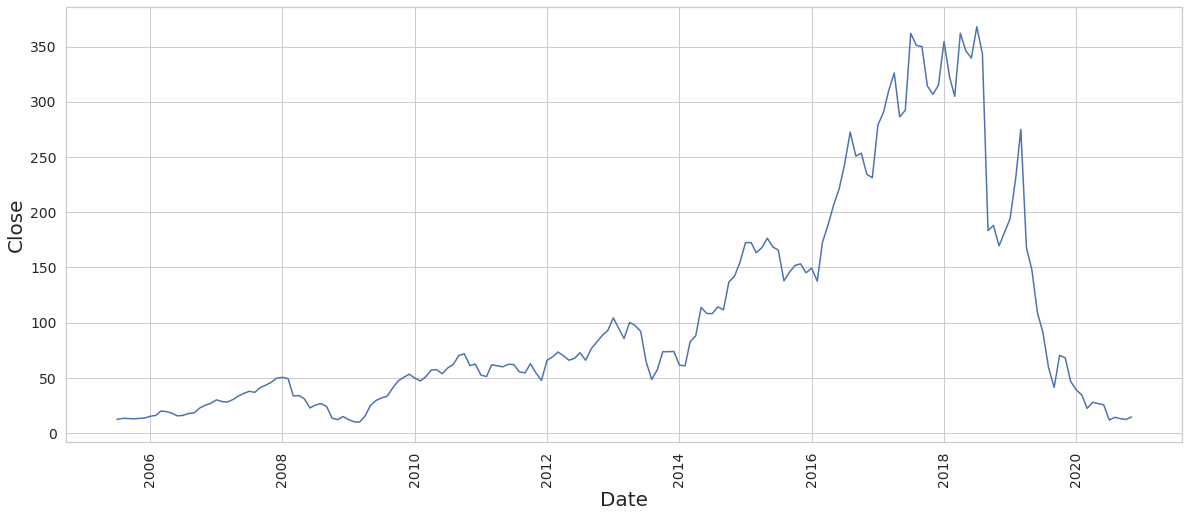

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(x=df['Date'], y=df['Close'])
plt.xlabel('Date', fontsize= 20)
plt.ylabel('Close', fontsize= 20)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 <a list of 11 Text major ticklabel objects>)

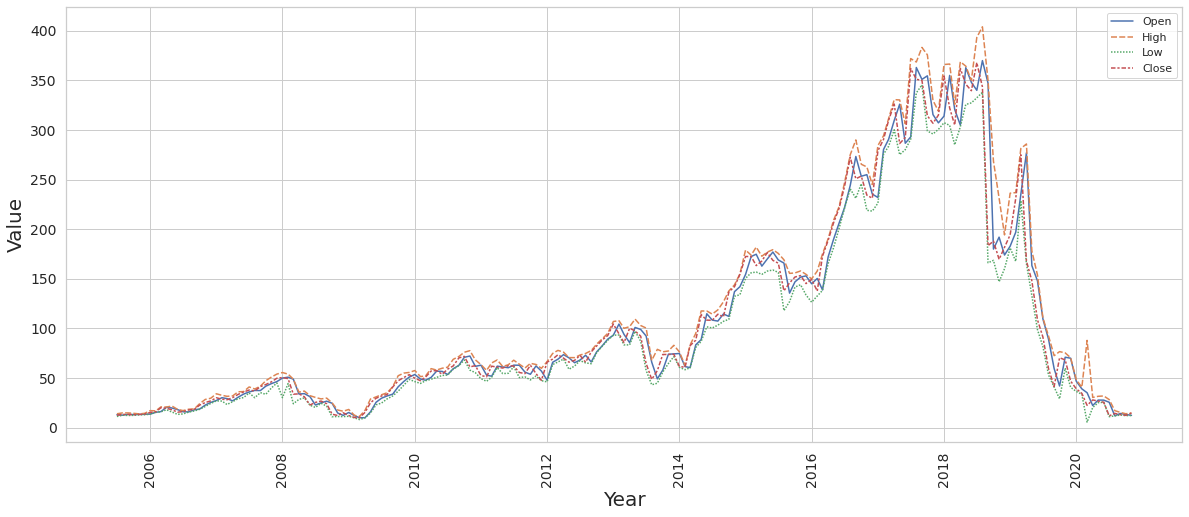

In [ ]:
all_plot =df.groupby(['Date']).agg({'Open':"sum",'High':"sum",'Low':"sum",'Close':"sum"})
plt.figure(figsize=(20,8))

sns.lineplot(data=all_plot)
plt.xlabel('Year', fontsize= 20)
plt.ylabel('Value', fontsize= 20)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)


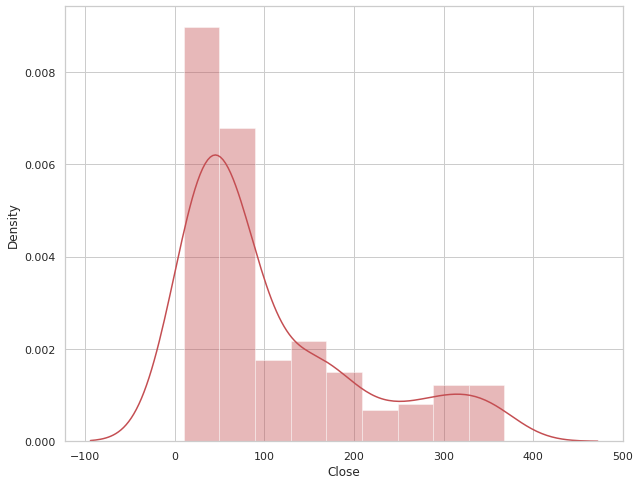

In [ ]:
plt.figure(figsize=(10,8))
sns.distplot(df['Close'], color= 'r')

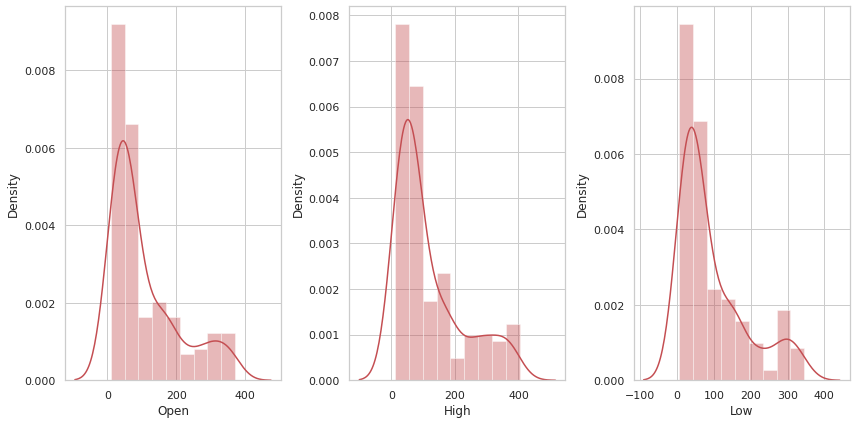

In [ ]:
# subplots and figure size
fig, axs = plt.subplots(ncols=3,figsize=(12,6))
#graph plot
sns.distplot(df['Open'], color='r', ax=axs[0])
sns.distplot(df['High'], color='r', ax=axs[1])
sns.distplot(df['Low'], color='r',ax=axs[2])



# this prevents plots from overlapping
plt.tight_layout()

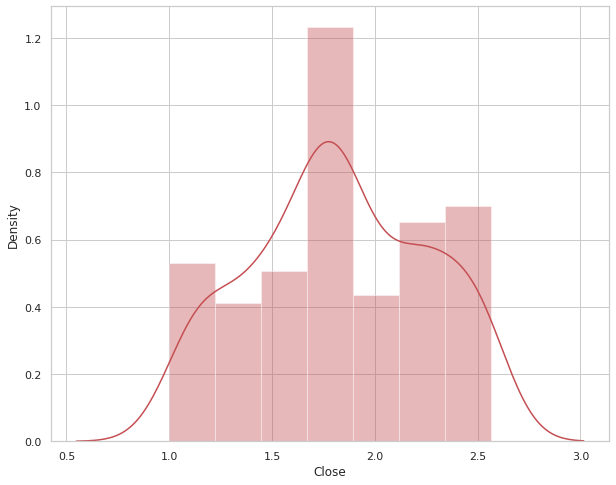

In [ ]:

plt.figure(figsize=(10,8))
sns.distplot(np.log10(df['Close']), color= 'r')

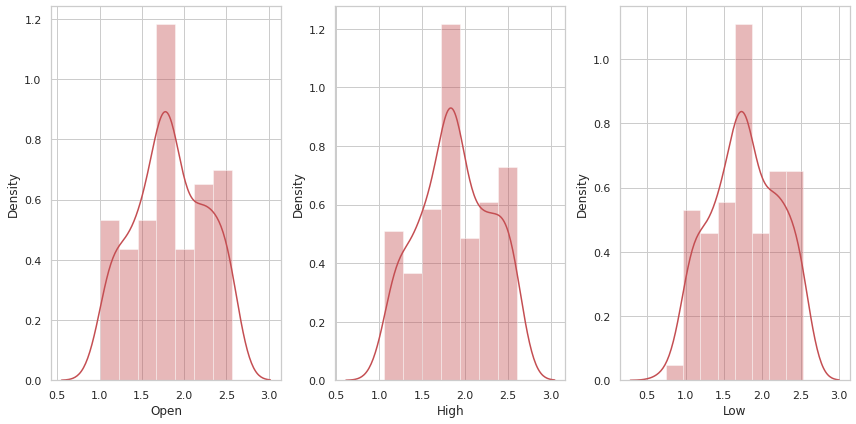

In [ ]:
# subplots and figure size
fig, axs = plt.subplots(ncols=3,figsize=(12,6))
#graph plot
sns.distplot(np.log10(df['Open']), color='r', ax=axs[0])
sns.distplot(np.log10(df['High']), color='r', ax=axs[1])
sns.distplot(np.log10(df['Low']), color='r',ax=axs[2])



# this prevents plots from overlapping
plt.tight_layout()

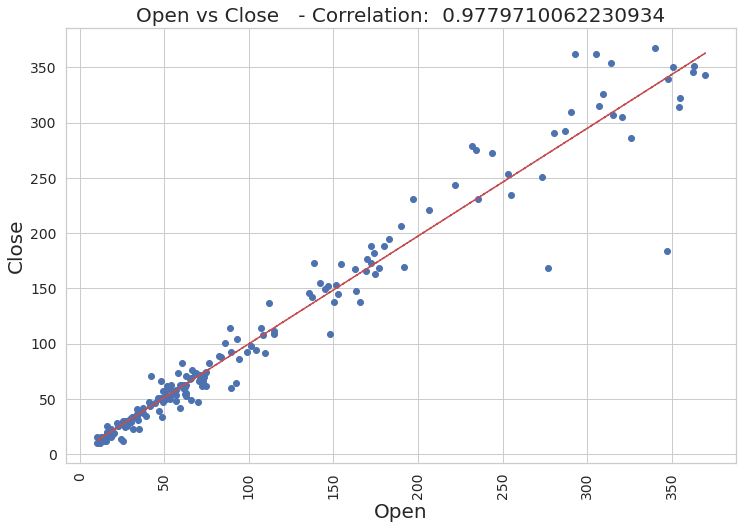

In [ ]:
stock_close=df['Close']
correlation= df['Open'].corr(stock_close)
fig = plt.figure(figsize=(12, 8))
ax = fig.gca()
plt.scatter(x= df['Open'], y= df['Close'])
ax.set_title("Open vs Close" + "   - Correlation:  " + str(correlation), fontsize=20)
plt.xlabel('Open', fontsize= 20)
plt.ylabel('Close', fontsize= 20)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)

z = np.polyfit(df['Open'], df['Close'], 1)
y_hat = np.poly1d(z)(df["Open"])

plt.plot(df["Open"], y_hat, "r--", lw=1.5)

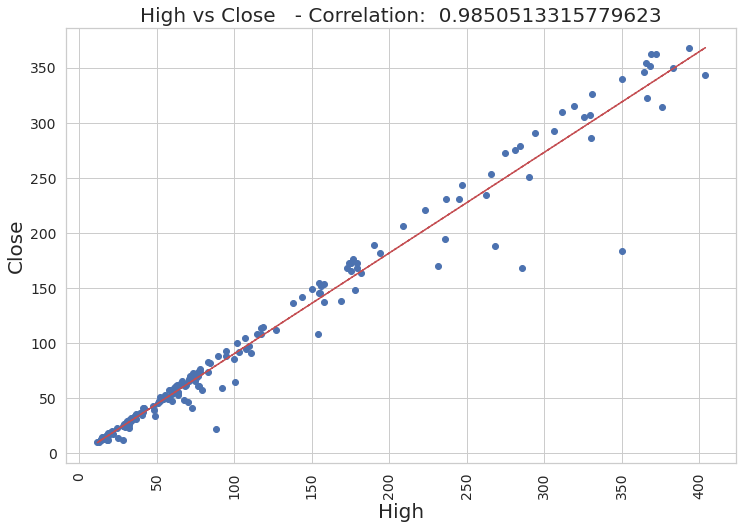

In [ ]:
stock_close=df['Close']
correlation= df['High'].corr(stock_close)
fig = plt.figure(figsize=(12, 8))
ax = fig.gca()
plt.scatter(x= df['High'], y= df['Close'])
ax.set_title("High vs Close" + "   - Correlation:  " + str(correlation), fontsize=20)
plt.xlabel('High', fontsize= 20)
plt.ylabel('Close', fontsize= 20)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)

z = np.polyfit(df['High'], df['Close'], 1)
y_hat = np.poly1d(z)(df["High"])

plt.plot(df["High"], y_hat, "r--", lw=1.5)



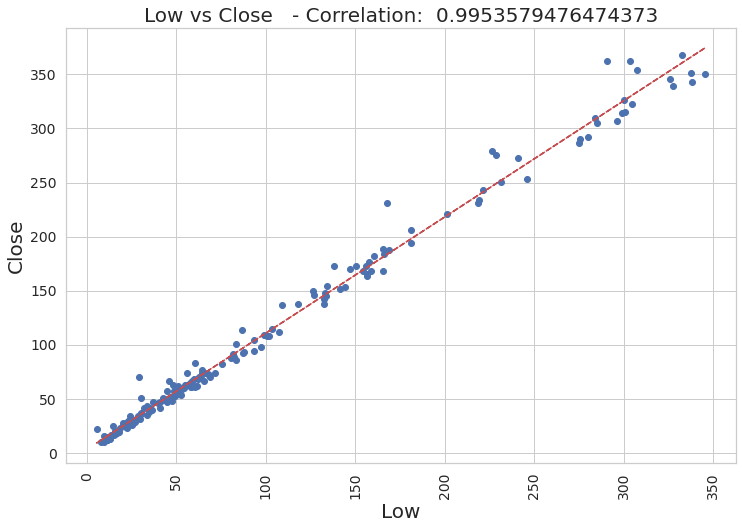

In [ ]:
stock_close=df['Close']
correlation= df['Low'].corr(stock_close)
fig = plt.figure(figsize=(12, 8))
ax = fig.gca()
plt.scatter(x= df['Low'], y= df['Close'])
ax.set_title("Low vs Close" + "   - Correlation:  " + str(correlation), fontsize=20)
plt.xlabel('Low', fontsize= 20)
plt.ylabel('Close', fontsize= 20)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)

z = np.polyfit(df['Low'], df['Close'], 1)
y_hat = np.poly1d(z)(df["Low"])

plt.plot(df["Low"], y_hat, "r--", lw=1.5)



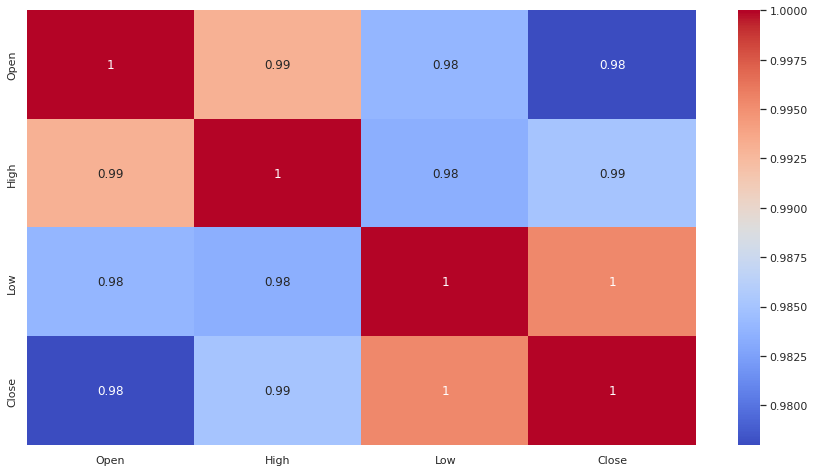

In [ ]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

##**Transforming & Spliting Data

In [ ]:
#head of the dataset
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


X = Independant Variable


y = Dependent Variable 

In [ ]:
# Splitting our data into Dependent and Independent Variables
X = df.drop(columns=['Close','Date'])
y = df['Close']

Data must be normal distributed. So applying narmalization on X & y. So applying normalisation on x & y.

In [ ]:
# Data transformation
from scipy.stats import zscore
X = X.apply(zscore)
y = np.log10(y)

training and testing data split, since dataset is small training date be 80% and testing data be 20%

In [ ]:
# Spliting Data into Testing and Training Datasets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 1)

In [ ]:
#checking shape of training dataset.
X_train.shape

(148, 3)

In [ ]:
#checking shape of testing dataset.
X_test.shape

(37, 3)

In [ ]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(X_test)

##1.Linear Regression

In [ ]:
#fitting data into Linear Regression
linear_reg = LinearRegression()
linear_reg_model = linear_reg.fit(X_train,y_train)

In [ ]:
#train accuracy of linear regression model
round(linear_reg.score(X_train,y_train), 3)

0.815

In [ ]:
np.array (y_test )

array([1.4034637 , 1.40823997, 1.72090317, 1.08849047, 2.17011497,
       2.53096768, 1.68708284, 1.44638181, 1.3588862 , 1.69757803,
       2.21301278, 1.70731463, 1.12742878, 2.49837948, 1.84553212,
       1.69390274, 1.4724639 , 2.17429246, 2.05648559, 1.94517305,
       1.50419892, 1.19368103, 2.0342674 , 1.81947813, 2.22520587,
       1.2662317 , 1.08778142, 1.69731654, 1.45682135, 1.81967552,
       2.43941165, 2.53932706, 1.7895102 , 2.36973522, 2.00121433,
       1.72762258, 2.38639194])

In [ ]:
#test accuracy of linear regression model
round(linear_reg.score(X_test,y_test), 3)

0.823

In [ ]:
#prediction of test data.
y_pred = linear_reg.predict(X_test)
y_pred

array([1.51738682, 1.53211837, 1.63519027, 1.47539354, 2.01471458,
       2.74366588, 1.62601875, 1.51851685, 1.52352095, 1.62092587,
       2.07716025, 1.61560053, 1.47290774, 2.63685207, 1.70384859,
       1.61032504, 1.52501328, 1.95399032, 1.81967493, 1.76423173,
       1.53162271, 1.480381  , 1.83883617, 1.6394682 , 2.05986731,
       1.49003242, 1.4767562 , 1.61402383, 1.53535964, 1.66894676,
       2.4177132 , 2.75914846, 1.68261819, 2.34869197, 1.78260049,
       1.62415017, 2.34100799])

In [ ]:

print("MSE :",round(mean_squared_error(y_test, y_pred), 3))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred)),3))
print("MAE :",round(mean_absolute_error(y_test, y_pred),3))
print("MAPE :",round(mean_absolute_percentage_error(y_test, y_pred),3))
print("R2 :",round(r2_score(y_test, y_pred), 3))

MSE : 0.032
RMSE : 0.178
MAE : 0.151
MAPE : 0.095
R2 : 0.823


Actual Vs closing price

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.]),
 <a list of 9 Text major ticklabel objects>)

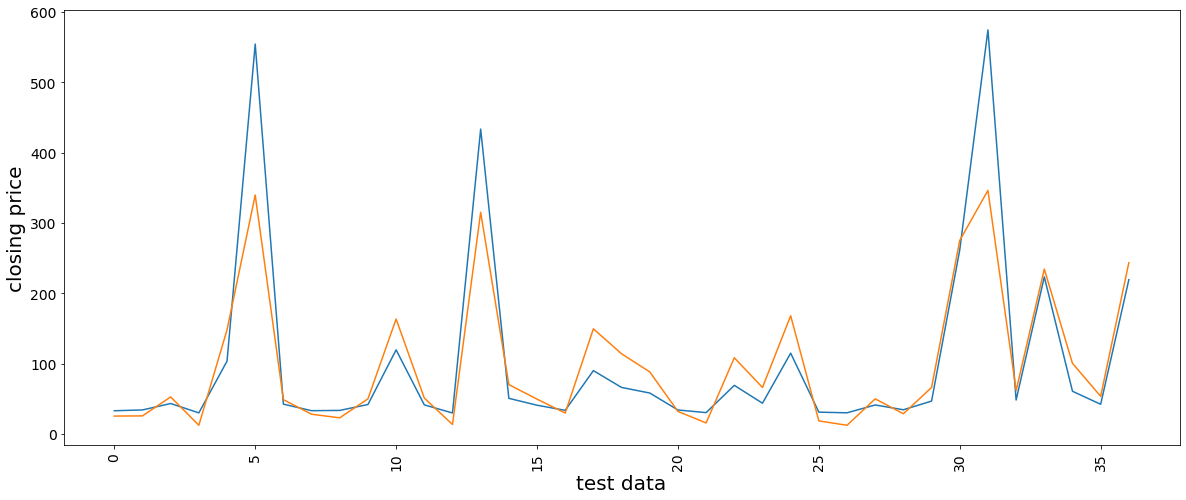

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(data=10**y_pred)
sns.lineplot(data=10**(np.array (y_test)))
plt.xlabel('test data', fontsize= 20)
plt.ylabel('closing price', fontsize= 20)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)

##2. Lasso Regression

In [ ]:
lasso = Lasso(alpha=0.001, max_iter = 3000)
lasso.fit(X_train, y_train)